In [16]:

import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import folium  
from sklearn.model_selection import train_test_split  


file_path = "natural_disaster_dataset.csv"  
disaster_data = pd.read_csv(file_path)


print(disaster_data.head())
disaster_data.shape




   ID Disaster_Type        Date       Location   Latitude   Longitude  \
0   1      Wildfire  2021-09-05     Joyceshire  15.506254  158.236974   
1   2      Wildfire  2021-08-20     West Glenn  39.615202 -113.398890   
2   3    Earthquake  2024-02-08    Lake Taylor  32.638456 -117.508883   
3   4         Flood  2022-06-24  West Samantha -26.395986  167.674667   
4   5      Wildfire  2023-09-05     Whiteville  74.945082  -50.263144   

   Magnitude  Depth  Wind_Speed  Rainfall  Temperature  Humidity  \
0        NaN    NaN         NaN       NaN        -11.8      24.7   
1        NaN    NaN         NaN       NaN        -19.9      97.8   
2        6.1  677.1         NaN       NaN        -28.6      94.2   
3        NaN    NaN         NaN     321.6         42.4      73.9   
4        NaN    NaN         NaN       NaN         33.1      98.2   

   Historical_Frequency  
0                    17  
1                     7  
2                     5  
3                    14  
4                     

(1000, 13)

In [17]:
disaster_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Disaster_Type         1000 non-null   object 
 2   Date                  1000 non-null   object 
 3   Location              1000 non-null   object 
 4   Latitude              1000 non-null   float64
 5   Longitude             1000 non-null   float64
 6   Magnitude             268 non-null    float64
 7   Depth                 268 non-null    float64
 8   Wind_Speed            235 non-null    float64
 9   Rainfall              248 non-null    float64
 10  Temperature           1000 non-null   float64
 11  Humidity              1000 non-null   float64
 12  Historical_Frequency  1000 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 101.7+ KB


In [18]:
import pandas as pd
import numpy as np

# Handle Missing Values: Fill missing numeric columns with their median
data_cleaned = disaster_data.copy()
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert Data Types
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format="%Y-%m-%d")
data_cleaned['Disaster_Type'] = data_cleaned['Disaster_Type'].astype('category')

# Display first few rows
print(data_cleaned.head())

   ID Disaster_Type       Date       Location   Latitude   Longitude  \
0   1      Wildfire 2021-09-05     Joyceshire  15.506254  158.236974   
1   2      Wildfire 2021-08-20     West Glenn  39.615202 -113.398890   
2   3    Earthquake 2024-02-08    Lake Taylor  32.638456 -117.508883   
3   4         Flood 2022-06-24  West Samantha -26.395986  167.674667   
4   5      Wildfire 2023-09-05     Whiteville  74.945082  -50.263144   

   Magnitude  Depth  Wind_Speed  Rainfall  Temperature  Humidity  \
0        6.5  393.5       176.5     262.7        -11.8      24.7   
1        6.5  393.5       176.5     262.7        -19.9      97.8   
2        6.1  677.1       176.5     262.7        -28.6      94.2   
3        6.5  393.5       176.5     321.6         42.4      73.9   
4        6.5  393.5       176.5     262.7         33.1      98.2   

   Historical_Frequency  
0                    17  
1                     7  
2                     5  
3                    14  
4                     6  


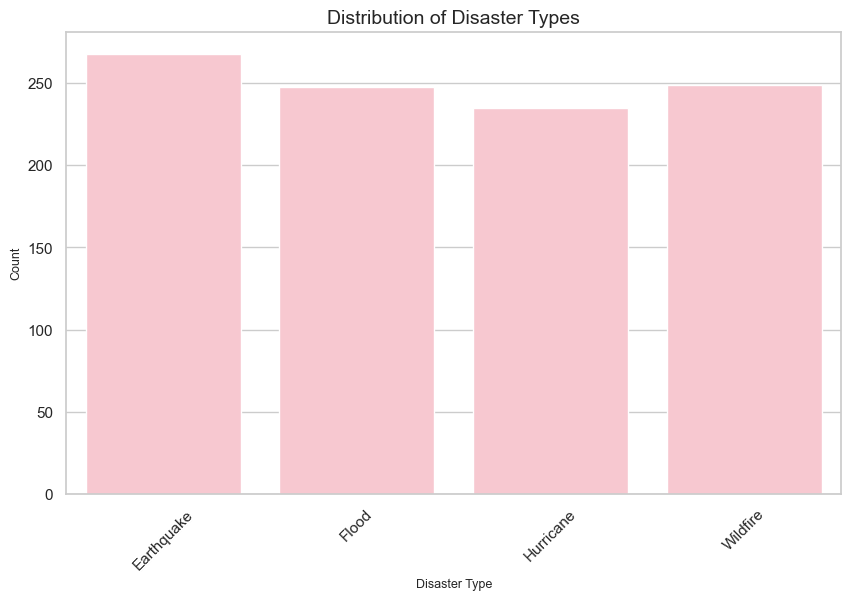

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for styling (similar to theme_minimal in ggplot2)
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x="Disaster_Type", color="pink")

# Add labels and title
plt.title("Distribution of Disaster Types", fontsize=14)
plt.xlabel("Disaster Type", fontsize=9)
plt.ylabel("Count", fontsize=9)

# Rotate x-axis labels if there are many categories
plt.xticks(rotation=45)

# Show the plot
plt.show()

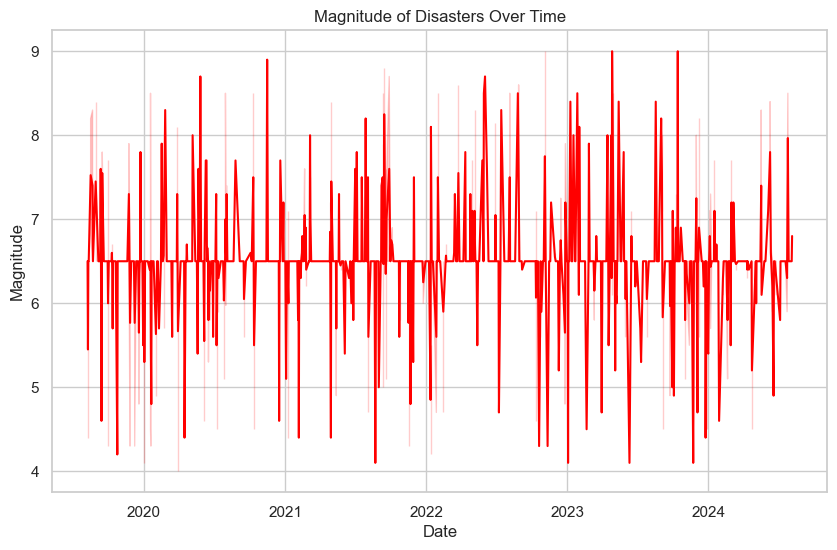

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_cleaned is a Pandas DataFrame
plt.figure(figsize=(10,6))
sns.lineplot(data=data_cleaned, x='Date', y='Magnitude', color='red')
plt.title('Magnitude of Disasters Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import folium

# Load the data (example if reading from CSV)
data_cleaned = pd.read_csv("natural_disaster_dataset.csv")  # Ensure the correct path

# Check if Latitude and Longitude columns exist
if 'Latitude' in data_cleaned.columns and 'Longitude' in data_cleaned.columns:
    m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=4)
else:
    print("Latitude or Longitude columns not found in data_cleaned.")


In [29]:
import folium
import pandas as pd



color_map = {
    'Flood': 'blue',
    'Earthquake': 'red',
    'Hurricane': 'green',
    
    
}

for index, row in data_cleaned.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], 
                         radius=3, 
                         color=color_map.get(row['Disaster_Type'], 'black'), 
                         popup=f"{row['Disaster_Type']}<br>{row['Date']}").add_to(m)

m.add_child(folium.TileLayer())



In [23]:
##step4


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(data_cleaned, test_size=0.3, random_state=42, stratify=data_cleaned["Disaster_Type"])


print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")


Train Data Shape: (700, 13)
Test Data Shape: (300, 13)


In [25]:
X = data_cleaned[['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Wind_Speed', 
                  'Rainfall', 'Temperature', 'Humidity', 'Historical_Frequency']]
y = data_cleaned['Disaster_Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
##step5

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model with cross-validation
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_features': [3, 5, 7]}
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_features': 3, 'n_estimators': 100}


In [29]:
#step6

In [30]:
# Import necessary metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Confusion Matrix:
 [[90  0  0  0]
 [ 0 74  0  0]
 [ 0  0 68  1]
 [ 0  0  0 67]]

Classification Report:
               precision    recall  f1-score   support

  Earthquake       1.00      1.00      1.00        90
       Flood       1.00      1.00      1.00        74
   Hurricane       1.00      0.99      0.99        69
    Wildfire       0.99      1.00      0.99        67

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 99.67%


In [31]:
##step7

In [32]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Step 1: Load the dataset
# file_path = "natural_disaster_dataset.csv"  # Update the file path as necessary
# data = pd.read_csv(file_path)

# # Step 2: Data Cleaning
# data_cleaned = data.copy()

# # Fill missing numeric columns with their median
# numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
# data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())

# # Convert 'Date' to datetime and 'Disaster_Type' to category
# data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%Y-%m-%d')
# data_cleaned['Disaster_Type'] = data_cleaned['Disaster_Type'].astype('category')

# # Step 3: Split the Data into Training and Testing Sets
# X = data_cleaned[
#     ['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Wind_Speed', 'Rainfall',
#      'Temperature', 'Humidity', 'Historical_Frequency']
# ]
# y = data_cleaned['Disaster_Type']

# # Split into training (70%) and testing (30%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Step 4: Define 10-Fold Cross-Validation and Hyperparameter Tuning
# param_grid = {
#     'max_features': [2, 3, 5, 7, 9],  # Equivalent to mtry in R
#     'n_estimators': [100],  # Number of trees in the forest
#     'random_state': [42]
# }

# # Use StratifiedKFold for 10-fold cross-validation
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize RandomForestClassifier
# rf_model = RandomForestClassifier()

# # Use GridSearchCV to perform hyperparameter tuning with cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Step 5: Evaluate the Optimal Model
# best_model = grid_search.best_estimator_

# # Predict on the test data
# y_pred = best_model.predict(X_test)

# # Accuracy and classification report
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Optimal Parameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy:.2f}")
# print("\nClassification Report:\n", report)

# # Display cross-validation results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# print("\nCross-Validation Results:\n", cv_results[['param_max_features', 'mean_test_score', 'std_test_score']])
